In [5]:
# HARMONIA

""""
This project idea is currently in the conceptual stage and requires implementation and integration 
with a UX/UI design app and the blockchain. 

""""""

In [ ]:
import requests

In [6]:
# API´s for Spotify and DeepAI
Spotify = requests.get('https://developer.spotify.com/documentation/web-api')
print("Spotify:", Spotify.status_code)
Api = requests.get('https://openai.com/blog/dall-e-api-now-available-in-public-beta')
print("Api:", Api.status_code)


Spotify: 200
Api: 200


In [7]:
# API for OpenAI
import os
import openai
from IPython.display import Image, display
import requests
from bs4 import BeautifulSoup

with open('api_key.txt', 'r') as file:
    api_key = file.read().strip()

openai.api_key = api_key
openai.Model.list()

<OpenAIObject list at 0x7fb753f013b0> JSON: {
  "data": [
    {
      "created": 1677532384,
      "id": "whisper-1",
      "object": "model",
      "owned_by": "openai-internal",
      "parent": null,
      "permission": [
        {
          "allow_create_engine": false,
          "allow_fine_tuning": false,
          "allow_logprobs": true,
          "allow_sampling": true,
          "allow_search_indices": false,
          "allow_view": true,
          "created": 1683912666,
          "group": null,
          "id": "modelperm-KlsZlfft3Gma8pI6A8rTnyjs",
          "is_blocking": false,
          "object": "model_permission",
          "organization": "*"
        }
      ],
      "root": "whisper-1"
    },
    {
      "created": 1649358449,
      "id": "babbage",
      "object": "model",
      "owned_by": "openai",
      "parent": null,
      "permission": [
        {
          "allow_create_engine": false,
          "allow_fine_tuning": false,
          "allow_logprobs": true,
      

In [34]:
# Importing your personal Spotify account (part 1)
import base64

# Client credentials
client_id = "5947fbd4e1ce44aeb590795325c05989"
client_secret = "0b11702aa7ff4703b710b46749361ad0"

# Encode client credentials
client_credentials = f"{client_id}:{client_secret}"
client_credentials_base64 = base64.b64encode(client_credentials.encode()).decode()

# Set up headers for requesting access token
headers = {
    "Authorization": f"Basic {client_credentials_base64}",
}

# Request access token
response = requests.post(
    "https://accounts.spotify.com/api/token",
    data={"grant_type": "client_credentials"},
    headers=headers,
)

# Extract access token from response
access_token = response.json()["access_token"]

# Set up headers with access token
headers = {"Authorization": f"Bearer {access_token}"}

# Set up URL for retrieving user's playlists
user_id = "11137372081"
url = f"https://api.spotify.com/v1/users/{user_id}/playlists"

# Make request to Spotify API to retrieve user's playlists
response = requests.get(url, headers=headers)

# Parse response JSON
playlists_data = response.json()

# Print the names of the user's playlists
if "items" in playlists_data:
    playlists = playlists_data["items"]
    print("User's Playlists:")
    for i, playlist in enumerate(playlists):
        playlist_name = playlist["name"]
        playlist_id = playlist["id"]
        print(f"{i+1}. Name: {playlist_name}, ID: {playlist_id}")
else:
    print("No playlists found for the user.")


User's Playlists:
1. Name: Portuguesa, ID: 4Gpe8zVbhobtIK8WCdhJbl
2. Name: A playlist de Xabi Alonso, ID: 6FjLZSbDaepZq1ySCiJq3m
3. Name: Indie Lusitano, ID: 37i9dQZF1DX6HJZtcjGrCn
4. Name: Indiespensável, ID: 37i9dQZF1DWXx6OpWBkqVv
5. Name: Indie Stage, ID: 37i9dQZF1DX1hBl8Jfe9dd
6. Name: Brasileira, ID: 3LwHAo2YPdocpmL2mkVGnv
7. Name: The Tourist, ID: 0CjLMaQ6sa2uybdryNS5Ve
8. Name: Peaceful, ID: 3GCpjYvOZFSNsDsbTx74cN
9. Name: Dulcet, ID: 56Vw2ECh53BdRHHjJWdExg


In [35]:
# Importing your personal Spotify account (part 2)
import requests
import base64

# Set up Spotify client credentials
client_id = "5947fbd4e1ce44aeb590795325c05989"
client_secret = "0b11702aa7ff4703b710b46749361ad0"

# Encode client credentials
client_credentials = f"{client_id}:{client_secret}"
client_credentials_base64 = base64.b64encode(client_credentials.encode()).decode()

# Set up headers for requesting access token
headers = {
    "Authorization": f"Basic {client_credentials_base64}",
}

# Request access token from Spotify API
response = requests.post(
    "https://accounts.spotify.com/api/token",
    data={"grant_type": "client_credentials"},
    headers=headers,
)

# Extract access token from response
access_token = response.json()["access_token"]
headers = {"Authorization": "Bearer " + access_token}
access_token


'BQANi7qcaCVeknGN1bbOyNC0AwV16bAO_qKoUZdeAZl6niFMXedddmqj34QNdGLgBC8E8bOjGbkDlT2NTGzO4uGTcDhu6XEdAcpZpWjypIW5GfrAIdQ'

In [36]:
# Generating AI images from Deep AI (Album) - Test

from bs4 import BeautifulSoup
from IPython.display import Image, display

# Set up the headers for DeepAI API
api_key = 'd0bf27b8-09fe-4c86-896e-88048e95d5af'
headers_deepai = {'api-key': api_key}

# Ask the user to input the album name
album_query = input("Enter the album name: ")

# Search for the album on Spotify API
search_url = f"https://api.spotify.com/v1/search?q={album_query}&type=album"
response = requests.get(search_url, headers=headers)
search_results = response.json()

# Check if the "albums" key is present in the search results
if "albums" in search_results:
    # Get the first album from the search results
    first_album = search_results["albums"]["items"][0]

    # Retrieve the album ID
    album_id = first_album["id"]

    # Retrieve the album name and artist
    album_name = first_album["name"]
    artist_name = first_album["artists"][0]["name"]

    # Print the album details
    print("Album Name:", album_name)
    print("Artist:", artist_name)

    # Display the available styles
    print("Available styles:")
    styles = [
        "text2img",
        "cute-creature-generator",
        "fantasy-world-generator",
        "cyberpunk-generator",
        "fantasy-world-generator",
        "anime-portrait-generator",
        "old-style-generator",
        "renaissance-painting-generator",
        "abstract-painting-generator",
        "impressionism-painting-generator",
        "surreal-graphics-generator",
        "3d-objects-generator",
        "origami-3d-generator",
        "hologram-3d-generator",
        "3d-character-generator",
        "watercolor-painting-generator",
        "pop-art-generator",
        "contemporary-architecture-generator",
        "future-architecture-generator",
        "watercolor-architecture-generator",
        "fantasy-character-generator",
        "steampunk-generator",
        "logo-generator",
        "pixel-art-generator",
        "street-art-generator",
        "surreal-portrait-generator",
        "anime-world-generator",
        "fantasy-portrait-generator",
        "comics-portrait-generator",
        "cyberpunk-portrait-generator"
    ]
    for i, style in enumerate(styles):
        print(f"{i+1}. {style}")
        
    # Ask the user to select a style
    style_index = int(input("Enter the number of the style you want to use: "))
    selected_style = styles[style_index - 1]

    # Ask the user to input their feeling and describe the style
    feeling = input("Enter your feeling: ")
    
    # Set up the text for image generation
    text = f"{feeling},{album_name}, {artist_name}"

    # Make a POST request to DeepAI API for image generation
    data = {'text': text}
    response_deepai = requests.post(f"https://api.deepai.org/api/{selected_style}", data=data, headers=headers_deepai)
    response_json = response_deepai.json()

    # Check if the response is successful
    if 'output_url' in response_json:
        # Retrieve the generated image URL
        image_url = response_json['output_url']
        print("Generated image URL:", image_url)

        # Display the image in the notebook
        display(Image(url=image_url))
    else:
        # If the response does not contain the image URL, print the error message
        error_message = response_json['err']
        print("Failed to generate image. Error:", error_message)
else:
    # Handle the case when no albums are found
    print("No albums found for the given query.")


Enter the album name: whatevr pople say i am
Album Name: Whatever People Say I Am, That's What I'm Not
Artist: Arctic Monkeys
Available styles:
1. text2img
2. cute-creature-generator
3. fantasy-world-generator
4. cyberpunk-generator
5. fantasy-world-generator
6. anime-portrait-generator
7. old-style-generator
8. renaissance-painting-generator
9. abstract-painting-generator
10. impressionism-painting-generator
11. surreal-graphics-generator
12. 3d-objects-generator
13. origami-3d-generator
14. hologram-3d-generator
15. 3d-character-generator
16. watercolor-painting-generator
17. pop-art-generator
18. contemporary-architecture-generator
19. future-architecture-generator
20. watercolor-architecture-generator
21. fantasy-character-generator
22. steampunk-generator
23. logo-generator
24. pixel-art-generator
25. street-art-generator
26. surreal-portrait-generator
27. anime-world-generator
28. fantasy-portrait-generator
29. comics-portrait-generator
30. cyberpunk-portrait-generator
Enter the 

In [53]:
# Generating AI images from OpenAI (Album)
import os
import requests
from bs4 import BeautifulSoup
from IPython.display import Image, display
import openai

with open('api_key.txt', 'r') as file:
    api_key = file.read().strip()
openai.api_key = api_key


# Ask the user to input the album name
album_query = input("Enter the album name: ")

# Search for the album on Spotify API
search_url = f"https://api.spotify.com/v1/search?q={album_query}&type=album"
response = requests.get(search_url, headers=headers)
search_results = response.json()

# Check if the "albums" key is present in the search results
if "albums" in search_results:
    # Get the first album from the search results
    first_album = search_results["albums"]["items"][0]

    # Retrieve the album ID
    album_id = first_album["id"]

    # Retrieve the album name and artist
    album_name = first_album["name"]
    artist_name = first_album["artists"][0]["name"]

    # Print the album details
    print("Album Name:", album_name)
    print("Artist:", artist_name)

    # Ask the user to input their feeling and describe the style
    feeling = input("Enter your feeling: ")
    style_description = input("Describe a style for the image (e.g. dark, happy, romantic): ")

    # Set up the text for image generation
    text = f"{feeling},{album_name}, {artist_name}; {style_description}"

    # Make a POST request to DeepAI API for image generation
    data = {'text': text}
    response_deepai = requests.post("https://api.deepai.org/api/text2img", data=data, headers=headers_deepai)
    response_json = response_deepai.json()

    # Check if the response is successful
    if 'output_url' in response_json:
        # Retrieve the generated image URL
        image_url = response_json['output_url']
        print("Generated image URL:", image_url)

        # Display the image in the notebook
        display(Image(url=image_url))
    else:
        # If the response does not contain the image URL, print the error message
        error_message = response_json['err']
        print("Failed to generate image. Error:", error_message)
else:
    # Handle the case when no albums are found
    print("No albums found for the given query.")

Enter the album name: is this it
Album Name: Is This It
Artist: The Strokes
Enter your feeling: nice
Describe a style for the image (e.g. dark, happy, romantic): romantic
Generated image URL: https://api.deepai.org/job-view-file/d16740d6-bdad-4598-938b-d98ea19b743b/outputs/output.jpg


In [54]:
# Generating AI images from OpenAI (Artists)

import os
import requests
from bs4 import BeautifulSoup
from IPython.display import Image, display
import openai

with open('api_key.txt', 'r') as file:
    api_key = file.read().strip()
openai.api_key = api_key

# Ask the user to input the band name
band_query = input("Enter the band name: ")

# Search for the band on Spotify API
search_url = f"https://api.spotify.com/v1/search?q={band_query}&type=artist"
response = requests.get(search_url, headers=headers)
search_results = response.json()

# Check if the "artists" key is present in the search results
if "artists" in search_results:
    # Get the first artist from the search results
    first_artist = search_results["artists"]["items"][0]

    # Retrieve the artist ID
    artist_id = first_artist["id"]

    # Retrieve the artist name
    artist_name = first_artist["name"]

    # Print the artist details
    print("Artist:", artist_name)

    # Ask the user to input their feeling and describe the style
    feeling = input("Enter your feeling: ")
    style_description = input("Describe a style for the image (e.g. dark, happy, romantic): ")

    # Set up the text for image generation
    text = f"{feeling},{artist_name}; {style_description}"

    # Make a POST request to DeepAI API for image generation
    data = {'text': text}
    response_deepai = requests.post("https://api.deepai.org/api/text2img", data=data, headers=headers_deepai)
    response_json = response_deepai.json()

    # Check if the response is successful
    if 'output_url' in response_json:
        # Retrieve the generated image URL
        image_url = response_json['output_url']
        print("Generated image URL:", image_url)

        # Display the image in the notebook
        display(Image(url=image_url))
    else:
        # If the response does not contain the image URL, print the error message
        error_message = response_json['err']
        print("Failed to generate image. Error:", error_message)
else:
    # Handle the case when no artists are found
    print("No artists found for the given query.")

Enter the band name: the strokes
Artist: The Strokes
Enter your feeling: nice
Describe a style for the image (e.g. dark, happy, romantic): vibe
Generated image URL: https://api.deepai.org/job-view-file/188041e4-fb5d-4a19-98d2-46ced8393396/outputs/output.jpg


In [55]:
# Generating AI images from OpenAI (Songs)

import os
import requests
from bs4 import BeautifulSoup
from IPython.display import Image, display
import openai

with open('api_key.txt', 'r') as file:
    api_key = file.read().strip()
openai.api_key = api_key

# Ask the user to input the song name
song_query = input("Enter the song name: ")

# Search for the song on Spotify API
search_url = f"https://api.spotify.com/v1/search?q={song_query}&type=track"
response = requests.get(search_url, headers=headers)
search_results = response.json()

# Check if the "tracks" key is present in the search results
if "tracks" in search_results:
    # Get the first track from the search results
    first_track = search_results["tracks"]["items"][0]

    # Retrieve the track ID
    track_id = first_track["id"]

    # Retrieve the track name
    track_name = first_track["name"]

    # Print the track details
    print("Track:", track_name)

    # Ask the user to input their feeling and describe the style
    feeling = input("Enter your feeling: ")
    style_description = input("Describe a style for the image (e.g. dark, happy, romantic): ")

    # Set up the text for image generation
    text = f"{feeling},{track_name}; {style_description}"

    # Make a POST request to DeepAI API for image generation
    data = {'text': text}
    response_deepai = requests.post("https://api.deepai.org/api/text2img", data=data, headers=headers_deepai)
    response_json = response_deepai.json()

    # Check if the response is successful
    if 'output_url' in response_json:
        # Retrieve the generated image URL
        image_url = response_json['output_url']
        print("Generated image URL:", image_url)

        # Display the image in the notebook
        display(Image(url=image_url))
    else:
        # If the response does not contain the image URL, print the error message
        error_message = response_json['err']
        print("Failed to generate image. Error:", error_message)
else:
    # Handle the case when no tracks are found
    print("No tracks found for the given query.")


Enter the song name: Californication
Track: Californication
Enter your feeling: Road 66 vibes
Describe a style for the image (e.g. dark, happy, romantic): american pop art
Generated image URL: https://api.deepai.org/job-view-file/3bae1d5b-705a-4b10-8f8d-b58fc91f8f4f/outputs/output.jpg


In [13]:
# Generating AI images for your personal playlists from OpenAI (Playlists)

import requests
import base64
from IPython.display import Image, display

# Client credentials
client_id = "5947fbd4e1ce44aeb590795325c05989"
client_secret = "0b11702aa7ff4703b710b46749361ad0"

# Encode client credentials
client_credentials = f"{client_id}:{client_secret}"
client_credentials_base64 = base64.b64encode(client_credentials.encode()).decode()

# Set up headers for requesting access token
headers = {
    "Authorization": f"Basic {client_credentials_base64}",
}

# Request access token
response = requests.post(
    "https://accounts.spotify.com/api/token",
    data={"grant_type": "client_credentials"},
    headers=headers,
)

# Extract access token from response
access_token = response.json()["access_token"]

# Set up headers with access token
headers = {"Authorization": f"Bearer {access_token}"}

# Set up URL for retrieving user's playlists
user_id = "11137372081"
url = f"https://api.spotify.com/v1/users/{user_id}/playlists"

# Make request to Spotify API to retrieve user's playlists
response = requests.get(url, headers=headers)

# Parse response JSON
playlists_data = response.json()

# Create a dictionary per playlist with top 5 songs and bands
playlist_dict = {}

if "items" in playlists_data:
    playlists = playlists_data["items"]
    for playlist in playlists:
        playlist_name = playlist["name"]
        playlist_id = playlist["id"]
        
        # Retrieve the top 5 songs in the playlist
        playlist_songs_url = f"https://api.spotify.com/v1/playlists/{playlist_id}/tracks?limit=5"
        playlist_songs_response = requests.get(playlist_songs_url, headers=headers)
        playlist_songs_data = playlist_songs_response.json()
        
        if "items" in playlist_songs_data:
            songs = playlist_songs_data["items"]
            song_dict = {}
            for song in songs:
                song_name = song["track"]["name"]
                artists = song["track"]["artists"]
                artist_names = [artist["name"] for artist in artists]
                song_dict[song_name] = artist_names
            playlist_dict[playlist_name] = song_dict

# Print the dictionary per playlist with top 5 songs and bands
for playlist_name, songs_dict in playlist_dict.items():
    print(playlist_name + ":")
    for song_name, artist_names in songs_dict.items():
        artist_names_str = ", ".join(artist_names)
        print(f"{song_name}: {artist_names_str}")
    print()

# Ask the user to select a playlist
playlist_query = input("Enter the name of the playlist you want to select: ")
selected_playlist = playlist_dict.get(playlist_query)

if not selected_playlist:
    print("Invalid playlist name. Please try again.")
else:
    # Set up the headers for DeepAI API
    api_key = 'd0bf27b8-09fe-4c86-896e-88048e95d5af'
    headers_deepai = {'api-key': api_key}

    # Ask the user to input their feeling
    feeling = input("Enter your feeling: ")

    # Display the available styles
    print("Available styles:")
    styles = [
        "text2img",
        "cute-creature-generator",
        "fantasy-world-generator",
        "cyberpunk-generator",
        "fantasy-world-generator",
        "anime-portrait-generator",
        "old-style-generator",
        "renaissance-painting-generator",
        "abstract-painting-generator",
        "impressionism-painting-generator",
        "surreal-graphics-generator",
        "3d-objects-generator",
        "origami-3d-generator",
        "hologram-3d-generator",
        "3d-character-generator",
        "watercolor-painting-generator",
        "pop-art-generator",
        "contemporary-architecture-generator",
        "future-architecture-generator",
        "watercolor-architecture-generator",
        "fantasy-character-generator",
        "steampunk-generator",
        "logo-generator",
        "pixel-art-generator",
        "street-art-generator",
        "surreal-portrait-generator",
        "anime-world-generator",
        "fantasy-portrait-generator",
        "comics-portrait-generator",
        "cyberpunk-portrait-generator"
    ]
    for i, style in enumerate(styles):
        print(f"{i+1}. {style}")
        
    # Ask the user to select a style
    style_index = int(input("Enter the number of the style you want to use: "))
    selected_style = styles[style_index - 1]

    # Get the name of the first songs in the playlist
    song_names = list(selected_playlist.keys())
    first_five_song_names = song_names[:5]

    # Set up the text for image generation
    text = f"{', '.join(first_five_song_names)} {feeling} Cover Album"
    # Make a POST request to DeepAI API for image generation
    data = {'text': text}
    response_deepai = requests.post(f"https://api.deepai.org/api/{selected_style}", data=data, headers=headers_deepai)
    response_json = response_deepai.json()

    # Check if the response is successful
    if 'output_url' in response_json:
        # Retrieve the generated image URL
        image_url = response_json['output_url']
        print("Generated image URL:", image_url)

        # Display the image in the notebook
        display(Image(url=image_url))
    else:
        # If the response does not contain the image URL, print the error message
        error_message = response_json['err']
        print("Failed to generate image. Error:", error_message)
    

Portuguesa:
Ouvi Dizer: Ornatos Violeta
Devagar: Ornatos Violeta
Como Afundar: Ornatos Violeta
Dez Lamúrias Por Gole: Ornatos Violeta
Chaga: Ornatos Violeta

A playlist de Xabi Alonso:
Perfect Day: Lou Reed
Feels Like We Only Go Backwards: Tame Impala
It Girl: The Brian Jonestown Massacre
Goin' Down Slow: Howlin' Wolf
Little Girl: Spiritualized

Indie Lusitano:
just wanna forget you: MARO
Barquinha: Expresso Transatlântico, CONAN OSIRIS
Good Girl: The Legendary Tigerman, Asia Argento
Os Raros: Benjamim, Samuel Uria
whatif: kikomori

Indiespensável:
Someday: The Strokes
What You Know: Two Door Cinema Club
Lisztomania: Phoenix
Pumped Up Kicks: Foster The People
Mr. Brightside: The Killers

Indie Stage:
Cool About It: boygenius, Julien Baker, Phoebe Bridgers, Lucy Dacus
Blood And Butter: Caroline Polachek
indieedgycool: GAYLE
What Is It About Me: Lola Young
BANG BANG!: Nessa Barrett

Brasileira:
Sambinha Bom: Mallu Magalhães
Santa Chuva: Marcelo Camelo
Meu Amor É Teu: Marcelo Camelo
Cartã

In [ ]:
# Generating AI images from songs content (Song Content)

In [14]:
import os
import openai
from IPython.display import Image, display
import requests
from bs4 import BeautifulSoup

with open('api_key.txt', 'r') as file:
    api_key = file.read().strip()

openai.api_key = api_key
openai.Model.list()

<OpenAIObject list at 0x7f8e91f96810> JSON: {
  "data": [
    {
      "created": 1677532384,
      "id": "whisper-1",
      "object": "model",
      "owned_by": "openai-internal",
      "parent": null,
      "permission": [
        {
          "allow_create_engine": false,
          "allow_fine_tuning": false,
          "allow_logprobs": true,
          "allow_sampling": true,
          "allow_search_indices": false,
          "allow_view": true,
          "created": 1683912666,
          "group": null,
          "id": "modelperm-KlsZlfft3Gma8pI6A8rTnyjs",
          "is_blocking": false,
          "object": "model_permission",
          "organization": "*"
        }
      ],
      "root": "whisper-1"
    },
    {
      "created": 1649358449,
      "id": "babbage",
      "object": "model",
      "owned_by": "openai",
      "parent": null,
      "permission": [
        {
          "allow_create_engine": false,
          "allow_fine_tuning": false,
          "allow_logprobs": true,
      

In [15]:
# Generating AI images from songs content (Song Content)

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('wordnet')
nltk.download('omw-1.4')

def get_song_summary(song_lyrics, num_words=10):
    # Preprocess the lyrics
    lyrics = song_lyrics.lower()
    word_tokens = word_tokenize(lyrics)
    word_tokens = [word for word in word_tokens if word.isalpha()]  # Remove punctuation
    stop_words = set(stopwords.words('english'))
    word_tokens = [word for word in word_tokens if word not in stop_words]  # Remove stop words

    # Extract the main idea (top keywords)
    word_freq = nltk.FreqDist(word_tokens)
    top_keywords = [word for word, _ in word_freq.most_common(num_words)]

    # Generate a summary (first few words)
    summary = ' '.join(word_tokens[:num_words])

    return top_keywords, summary

# Example usage
song_lyrics = '''
    I'm tired of being what you want me to be
Feeling so faithless, lost under the surface
Don't know what you're expecting of me
Put under the pressure of walking in your shoes
Every step that I take is another mistake to you
(Caught in the undertow, just caught in the undertow)
I've become so numb
I can't feel you there
Become so tired
So much more aware
I'm becoming this
All I want to do
Is be more like me
And be less like you
Can't you see that you're smothering me
Holding too tightly, afraid to lose control?
'Cause everything that you thought I would be
Has fallen apart right in front of you
Every step that I take is another mistake to you
(Caught in the undertow, just caught in the undertow)
And every second I waste is more than I can take
I've become so numb
I can't feel you there
Become so tired
So much more aware
I'm becoming this
All I want to do
Is be more like me
And be less like you
And I know
I may end up failing too
But I know
You were just like me with someone disappointed in you
I've become so numb
I can't feel you there
Become so tired
So much more aware
I'm becoming this
All I want to do
Is be more like me
And be less like you
I've become so numb
I can't feel you there
(I'm tired of being what you want me to be)
I've become so numb
I can't feel you there
(I'm tired of being what you want me to be)
'''

top_keywords, summary = get_song_summary(song_lyrics, num_words=4)

print("Top Keywords:", top_keywords)
print("Summary:", summary)

key_words = summary


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/andrefontourafaria/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/andrefontourafaria/nltk_data...


Top Keywords: ['become', 'like', 'tired', 'want']
Summary: tired want feeling faithless


In [16]:
# Generating AI images from songs content (Song Content)

import spacy
from collections import Counter
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

# Load the language model
nlp = spacy.load('en_core_web_sm')



lyrics = '''"No one knows what it's like
To be the bad man
To be the sad man
Behind blue eyes
And no one knows what it's like
To be hated
To be fated to telling only lies
But my dreams they aren't as empty
As my conscience seems to be
I have hours, only lonely
My love is vengeance
That's never free
No one knows what its like
To feel these feelings
Like I do
And I blame you
No one bites back as hard
On their anger
None of my pain and woe
Can show through
But my dreams they aren't as empty
As my conscience seems to be
I have hours, only lonely
My love is vengeance
That's never free
No one knows what its like
To be mistreated, to be defeated
Behind blue eyes
An no one know how to say
That they're sorry and don't worry
I'm not telling lies
But my dreams they aren't as empty
As my conscience seems to be
I have hours, only lonely
My love is vengeance
That's never free
No one knows what its like
To be the bad man
To be the sad man
Behind blue eyes"'''

# Split the text into words
word_list = lyrics.split()

# Exclude swear words
filtered_words = [word for word in word_list if word.lower()]

# Join the filtered words back into a string
lyrics_to_str = ' '.join(filtered_words)

# Tokenize the text into words
tokens = word_tokenize(lyrics_to_str)

# Perform part-of-speech tagging
tagged_words = pos_tag(tokens)

# Filter out nouns
nouns = [word for word, pos in tagged_words if pos.startswith('NN')]
filtered_lyrics = ' '.join(nouns)

# Process the lyrics
doc = nlp(filtered_lyrics)

# Extract keywords
keywords = []
for token in doc:
    if not token.is_stop and token.is_alpha:
        # Check if the token is inside double quotes
        if token.text.startswith('"') and token.text.endswith('"'):
            # Remove the double quotes and treat the quoted text as a single word
            quoted_text = re.sub(r'^"|"$', '', token.text)
            keywords.append(quoted_text)
        else:
            keywords.append(token.lemma_)
            
# Swear words to be filtered
swear_words = ['fuck', 'shit', 'damn', 'bitch', 'asshole', 'dick', 'nigga']  

# Count the occurrences of each keyword
keywords = [word for word in keywords if word not in swear_words]
keyword_counts = Counter(keywords)


# Select top 3-4 powerful words based on frequency

powerful_words = [word for word, count in keyword_counts.most_common(4)]
key_words = ', '.join(powerful_words)


# Print the powerful words
print(key_words)

man, eye, dream, conscience


In [19]:
# Generating AI images from songs content (Song Content)
import random

#list of all the available art styles
art_styles = [
    "Pixel Art",
    "Synthwave",
    "Impressionism",
    "Cubism",
    "Surrealism",
    "Abstract Expressionism",
    "Pop Art",
    "Pointillism",
    "Minimalism",
    "Art Nouveau",
    "Renaissance",
    "Street Art",
    "Photorealism",
    "Graffiti Art",
    "Fauvism",
    "Dadaism",
    "Op Art",
    "Realism",
    "Post-Impressionism",
    "Romanticism",
    "Symbolism",
    "Constructivism",
    "Surrealist Automatism",
    "Abstract Art",
    "Suprematism",
    "Geometric Abstraction",
    "Color Field Painting",
    "Conceptual Art",
    "Neo-Expressionism",
    "Installation Art",
    "Land Art",
    "Hyperrealism",
    "Indigenous Art",
    "Classical Art",
    "Rococo",
    "Social Realism",
    "Video Art",
    "New Media Art",
    "Contemporary Art",
    "Outsider Art"
]

art_style = random.choice(art_styles)
print(art_style)
# Ask the user to input their feeling and describe the style
song_artist = input("Enter your artist and a song name: ").lower()








Fauvism
Enter your artist and a song name: the strokes


In [20]:
# Generating AI images from songs content (Song Content)

# USE ONLY WHEN NECCESSARY DONT USE WITH EVERY TESTING, ONLY WHEN YOU WANT TO SEE IMAGES ITSELF

prompt = song_artist + key_words + art_style
image_size = "256x256"
num_images = 2

# Generate and display multiple images
for i in range(num_images):
    response = openai.Image.create(
        prompt=prompt,
        size=image_size
    )
    image_url = response['data'][0]['url']
    display(Image(url=image_url))


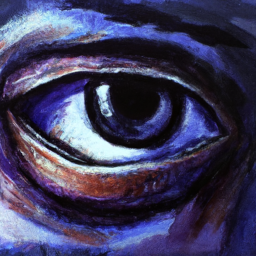

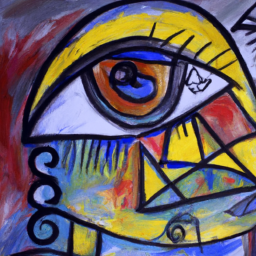

In [21]:
# Generating AI images from songs content (Song Content)

from PIL import Image
import requests

prompt = song_artist + key_words + art_style
image_size = "256x256"
num_images = 2

# Generate and display multiple images
for i in range(num_images):
    response = openai.Image.create(
        prompt=prompt,
        size=image_size
    )
    image_url = response['data'][0]['url']
    image_path = f"image_{i+1}.jpg"  # Path to save the image
    with open(image_path, 'wb') as f:
        f.write(requests.get(image_url).content)
    display(Image.open(image_path))

In [ ]:
# Generating AI images from songs content (Gamify)

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import re
import random

import spacy
from collections import Counter
import re
import nltk
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize, sent_tokenize

import os
import openai
from IPython.display import Image, display
import base64


In [2]:
Spotify = requests.get('https://developer.spotify.com/documentation/web-api')
print("Spotify:", Spotify.status_code)
Api = requests.get('https://openai.com/blog/dall-e-api-now-available-in-public-beta')
print("Api:", Api.status_code)

Spotify: 200
Api: 200


In [3]:
with open('api_key.txt', 'r') as file:
    api_key = file.read().strip()

openai.api_key = api_key
openai.Model.list()

<OpenAIObject list at 0x7feb8800f6d0> JSON: {
  "data": [
    {
      "created": 1677532384,
      "id": "whisper-1",
      "object": "model",
      "owned_by": "openai-internal",
      "parent": null,
      "permission": [
        {
          "allow_create_engine": false,
          "allow_fine_tuning": false,
          "allow_logprobs": true,
          "allow_sampling": true,
          "allow_search_indices": false,
          "allow_view": true,
          "created": 1683912666,
          "group": null,
          "id": "modelperm-KlsZlfft3Gma8pI6A8rTnyjs",
          "is_blocking": false,
          "object": "model_permission",
          "organization": "*"
        }
      ],
      "root": "whisper-1"
    },
    {
      "created": 1649358449,
      "id": "babbage",
      "object": "model",
      "owned_by": "openai",
      "parent": null,
      "permission": [
        {
          "allow_create_engine": false,
          "allow_fine_tuning": false,
          "allow_logprobs": true,
      

In [5]:
# Download the 'punkt' tokenizer resource
nltk.download('punkt')

# Load the language model
nlp = spacy.load('en_core_web_sm')

# Tokenize the text into words
tokens = word_tokenize("lyrics_to_str") #insert the lyrics

# Perform part-of-speech tagging
tagged_words = pos_tag(tokens)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/andrefontourafaria/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
'''
__________________

Selecting art style
__________________

'''


#list of all the available art styles
art_styles = [
    'Pixel Art', 'Synthwave', 'Impressionism', 'Cubism', 'Surrealism', 'Abstract Expressionism',
    'Pop Art', 'Pointillism', 'Minimalism', 'Art Nouveau', 'Renaissance', 'Street Art',
    'Photorealism', 'Graffiti Art', 'Fauvism', 'Dadaism', 'Op Art', 'Realism', 'Post-Impressionism',
    'Romanticism', 'Symbolism', 'Constructivism', 'Surrealist Automatism', 'Abstract Art',
    'Suprematism', 'Geometric Abstraction', 'Color Field Painting', 'Conceptual Art',
    'Neo-Expressionism', 'Installation Art', 'Land Art', 'Hyperrealism', 'Indigenous Art',
    'Classical Art', 'Rococo', 'Social Realism', 'Video Art', 'New Media Art', 'Contemporary Art',
    'Outsider Art'
]

art_style = random.choice(art_styles)
print(art_style)



'''
__________________

Ask the playlist
__________________

'''



# Set up the access token and headers for Spotify API
access_token3 = access_token
headers = {"Authorization": "Bearer " + access_token}

# Set up the headers for DeepAI API
api_key = 'd0bf27b8-09fe-4c86-896e-88048e95d5af'
headers_deepai = {'api-key': api_key}

# Ask the user to input the playlist name or link
playlist_query = input("Enter the playlist name or link: ")

# Check if the input is a Spotify playlist link
if "open.spotify.com/playlist/" in playlist_query:
    # Extract the playlist ID from the link
    playlist_id = playlist_query.split("/")[-1].split("?")[0]
else:
    # Search for the playlist on Spotify API
    search_url = f"https://api.spotify.com/v1/search?q={playlist_query}&type=playlist"
    response = requests.get(search_url, headers=headers)
    search_results = response.json()

    # Check if the "playlists" key is present in the search results
    if "playlists" in search_results:
        # Get the first playlist from the search results
        first_playlist = search_results["playlists"]["items"][0]

        # Retrieve the playlist ID
        playlist_id = first_playlist["id"]
    else:
        # Handle the case when no playlists are found
        print("No playlists found for the given query.")
        exit()

# Retrieve the playlist details from Spotify API
playlist_url = f"https://api.spotify.com/v1/playlists/{playlist_id}"
response = requests.get(playlist_url, headers=headers)
playlist_details = response.json()

# Retrieve the playlist name
playlist_name = playlist_details["name"]

# Print the playlist details
print("Playlist Name:", playlist_name)


'''
__________________

Getting 3 random songs
__________________

'''


# Retrieve the tracks from the playlist
playlist_tracks = playlist_details["tracks"]["items"]

# Select 3 random tracks from the playlist without repetition
random_tracks = random.sample(playlist_tracks, k=3)

# Store the artist names and song names in separate variables
artist_names = []
song_names = []

for i, random_track in enumerate(random_tracks, 1):
    artist_name = random_track["track"]["artists"][0]["name"]
    song_name = random_track["track"]["name"]
    
    artist_names.append(artist_name)
    song_names.append(song_name)
    
    # Print the details of the random track
    #print("Song:", song_name)
    #print("Artist:", artist_name)
    #print()

# Access the artist names and song names from the variables
first_artist = artist_names[0]
second_artist = artist_names[1]
third_artist = artist_names[2]

first_song = song_names[0]
second_song = song_names[1]
third_song = song_names[2]


'''
__________________

Print the random track details
__________________

'''


def convert_artist_and_song():
    while True:
        # Generate a random number between 0 and 2
        random_index = random.randint(0, 2)
        
        # Retrieve the artist name and song name at the random index
        artist_input = artist_names[random_index]
        song_input = song_names[random_index]

        # Remove special characters from artist_input
        artist_input = re.sub(r"[^\w\s]", "", artist_input)

        # Remove special characters from song_input
        song_input = re.sub(r"[^\w\s]", "", song_input)

        artist_text = "-".join(artist_input.lower().split())  # Convert artist text to lowercase and add dashes
        song_text = re.sub(r'\s+', '-', song_input.lower())

        url = 'https://genius.com/' + artist_text + '-' + song_text + '-lyrics'

        response = requests.get(url)
        soup = BeautifulSoup(response.content)

        pattern = re.compile(r'ReferentFragmentdesktop__Highlight.*')
        lyrics = soup.find_all('div', class_='Lyrics__Container-sc-1ynbvzw-5 Dzxov')
        lyrics_text = [span.get_text(separator='\n') for span in lyrics]
        lyrics_text = '\n'.join(lyrics_text)

        match = re.search(r'\[Chorus\]\n((?:.*?\n){2})', lyrics_text, re.DOTALL)

        if match:
            extracted_text = match.group(1)
            return url, random_index, extracted_text

        # If there are no lyrics, continue to the next iteration and select another random song
        continue


# Generate a random artist, song URL, and extracted lyrics
url, random_index, extracted_text = convert_artist_and_song()
correct_answer = random_index
#print(url)
#print(random_index)
#print(extracted_text)

'''
__________________

Check if the response is successful
__________________

'''
from IPython.display import clear_output

# Clear the output



def lyrics(extracted_text):
    easy_mode = None  # Initialize easy_mode variable
    lyrics_shown = False  # Flag variable to track if lyrics have been shown
    
    while easy_mode not in ['y', 'n']:
        easy_mode = input("Do you want to see the lyrics to make it easier? (y/n): ")
        clear_output(wait=True)

        if easy_mode == 'y' and not lyrics_shown:
            print('________')
            print()
            print('🎶 The lyrics are: 🎶')
            print(extracted_text)
            print('________')
            print()
            lyrics_shown = True  # Set flag to True after showing lyrics
        elif easy_mode == 'n':
            continue
        else:
            print('You entered an invalid answer. Please enter "y" or "n".')

def lyrics2(extracted_text):
    easy_mode = None  # Initialize easy_mode variable
    lyrics_shown = False  # Flag variable to track if lyrics have been shown
    
    while easy_mode not in ['y', 'n']:
        easy_mode = input("Do you want to check what the lyrics were? (y/n): ")
        
        if easy_mode == 'y' and not lyrics_shown:
            print('________')
            print()
            print('🎶 The lyrics are: 🎶')
            print(extracted_text)
            print('________')
            print()
            lyrics_shown = True  # Set flag to True after showing lyrics
        elif easy_mode == 'n':
            continue
        else:
            print('You entered an invalid answer. Please enter "y" or "n".')

def check_answer():
    lyrics(extracted_text)
    
    print()
    
    for i in range(0, 3):
        print("\033[1m" + str(i+1) + ')\033[0m' + " Song:", song_names[i])
        print("   Artist:", artist_names[i])
        print()
    
    answer = int(input('What is the song that you think is represented in this image? '))
    clear_output(wait=True)
    if (answer-1) == random_index:
        print()
        print('****************')
        print('Congratulations! You won!')
        print('****************')
        print()
        print("Song:", song_names[random_index])
        print("Artist:", artist_names[random_index])
        print()
    else:
        print('________')
        print()
        print('Sorry, the correct answer was:')
        print("Song:", song_names[random_index])
        print("Artist:", artist_names[random_index])
        print()
        print('________')
        print()
        lyrics2(extracted_text)


Video Art
Enter the playlist name or link: Portuguesa
Playlist Name: Musique Portugaise 2023  - Danse en Cours - Portugiesische / Viva Portugal  / À Portuguesa


In [ ]:
#display(Image(url=image_url))
check_answer()

In [ ]:

# USE ONLY WHEN NECCESSARY DONT USE WITH EVERY TESTING, ONLY WHEN YOU WANT TO SEE IMAGES ITSELF

prompt = extracted_text + art_style
image_size = "256x256"
num_images = 2

# Generate and display multiple images
for i in range(num_images):
    response = openai.Image.create(
        prompt=prompt,
        size=image_size
    )
    image_url = response['data'][0]['url']
    display(Image(url=image_url))


In [ ]:
from PIL import Image

image = Image.open(requests.get(image_url, stream=True).raw)

# Display the image in a new window
image.show()
